In [2]:
import numpy as np
# import pandas as pd
from IPython.display import display

from PIL import Image
from io import BytesIO
from urllib import request

from sklearn.cluster import DBSCAN

import tensorflow as tf
from tensorflow import keras

# from tensorflow.keras.preprocessing.image import load_img
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from tensorflow.keras.applications.xception import Xception
# from tensorflow.keras.applications.xception import preprocess_input
# from tensorflow.keras.applications.xception import decode_predictions

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings(action='ignore')

In [4]:
# my_model = keras.models.load_model("/kaggle/working/mask_model_c32_p2.h5")

detection_model = keras.models.load_model("/homw/winx/dice-detection-project/dice-detection-model-14-0.948.h5")
# detection_model.summary()

In [5]:
img_size = 128

classes = [
    'd10',
    'd12',
    'd20',
    'd4',
    'd6',
    'd8',
    'dicesback'
]

# start_path = '/kaggle/input/dice-d4-d6-d8-d10-d12-d20-images/dice' # for categorical sampling dice vs dice
# start_path = '/kaggle/working/dice' # for binary sampling dice vs blanc
# path = f"{start_path}/dice/valid/d10"
# file = "d10_top179.jpg"

lst = [
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230109_011654__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230109_013921__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230109_014133__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230110_205235__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230110_205256__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230110_205346__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230110_205406__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230110_205427__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011213__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011222__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011232__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011243__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011252__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011303__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011323__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011335__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011343__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230111_011354__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/IMG_20230112_193332__01.jpg"
]

lst_d10 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230110_205427__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230112_192635__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230112_192652__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230112_192848__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230112_192853__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d10/IMG_20230112_193157__01.jpg"
]

lst_d12 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_192520__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_192534__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_192546__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_192834__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_192841__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_193148__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_193213__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_193259__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_193327__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d12/IMG_20230112_193332__01.jpg"
]

lst_d20 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230110_205406__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_192626__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_192722__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_192933__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_192939__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_192939__02.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_193253__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d20/IMG_20230112_193309__01.jpg"
]

lst_d4 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230110_205235__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230110_205256__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192658__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192703__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192758__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192807__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192900__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_192912__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_193052__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_193106__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_193125__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d4/IMG_20230112_193131__01.jpg",
]

lst_d6 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d6/IMG_20230112_192616__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d6/IMG_20230112_192709__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d6/IMG_20230112_192816__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d6/IMG_20230112_193207__01.jpg",
]

lst_d8 = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230109_011654__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230109_013921__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230110_205346__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_192641__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_192646__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_192715__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_192920__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_192927__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_193034__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_193041__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_193224__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/d8/IMG_20230112_193231__01.jpg",
]

lst_back = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-IMG_20230110_205256__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_color001.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_color223.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_color338.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_color501.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_color604.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d20_off-angle_0231.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d8_color095.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d8_color263.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d8_color351.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d8_wood611.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/back/back-d8_wood888.jpg"
]

lst_few = [
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/few-dices/IMG_20230109_014133__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/few-dices/IMG_20230116_002416__01.jpg",
    "https://storage.yandexcloud.net/ybs-123123/dices-480x480/few-dices/IMG_20230116_002559__01.jpg"
]


def download_image(url):
    
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

def preprocess(X, rescale=255):
    
    if rescale:
        X = X*1./rescale
        return X

    return X

def layer_visualization(test_img, model, preprocess=preprocess, n_layer=4, img_size=299):
    
    if not isinstance(test_img, np.ndarray):
        x = np.array(test_img)
        X = np.array([x])
        X = preprocess(X)
    else:
        X = np.array([test_img])
    
    inputs = keras.Input(shape=(img_size, img_size, 3))

    viz_model = keras.Model(inputs=model.inputs, outputs=model.layers[n_layer].output)
    num_filters = viz_model.get_layer(index=n_layer).output.get_shape()[-1]

    display(viz_model.summary())

    features = viz_model.predict(X)[0]

    fig = plt.figure(figsize=(20, 15)) #, int(0.1*num_filters)))
    for i in range(1,features.shape[-1]):

        plt.subplot(int(num_filters/4)+1,4,i)
        plt.imshow(features[:,:,i-1] , cmap='gray')
    plt.tight_layout()
    plt.show()

def predict(X, model):

    class_prob = model.predict(X)

    return class_prob[0]

def get_feature_maps(X, model, img_size, n_layer=4):
    
    inputs = keras.Input(shape=(img_size, img_size, 3))

    viz_model = keras.Model(inputs=model.inputs, outputs=model.layers[n_layer].output)
    
    features = viz_model.predict(X)[0]
    
    return features


def get_feature_mask(feature_maps):
    """
    mask selection based on the less intercross
    """
    
    feature_maps[feature_maps > 0] = 1

    mask_sum = np.sum(np.sum(feature_maps, axis=0), axis=0)
    sel_layers = (mask_sum > 0.05*np.max(mask_sum))&(mask_sum < 0.95*np.max(mask_sum))

    selected_maps = feature_maps[:,:, sel_layers].copy()
    n = selected_maps.shape[-1]
    cross_scores = np.array([[np.sum(selected_maps[:,:, i]*selected_maps[:,:,j], dtype='int') if i<j else +np.inf for j in range(n)] for i in range(n)])

    # there can be multiple i,j combinations following upsample_mask function can handle few results
    i, j = np.where(cross_scores == np.min(cross_scores))

    print(i,j)
    if np.sum(selected_maps[:,:,i]) < np.sum(selected_maps[:,:,j]):
        fin_mask = selected_maps[:,:,i]
    else:
        fin_mask = selected_maps[:,:,j]

    # clearing the borders
    fin_mask[[0,fin_mask.shape[1]-1], :, :] = 0
    fin_mask[:, [0,fin_mask.shape[0]-1], :] = 0
        
    return fin_mask


def get_mask(features, threshold=1.5): #sample_url, viz_model, n_layer):
    """
    Mask selection based on mean feature maps approach
    """

#     sample_img_original = download_image(sample_url) 
#     sample_img = prepare_image(sample_img_original, (img_size, img_size))

#     x = np.array(sample_img)
#     X = np.array([x])
#     X = preprocess(X)

#     inputs = keras.Input(shape=(img_size, img_size, 3))

#     viz_map = keras.Model(inputs=viz_model.inputs, outputs=viz_model.layers[n_layer].output)
#     num_filters = viz_map.get_layer(index=n_layer).output.get_shape()[-1]

#     features = viz_map.predict(X)[0]
    
    num_filters = features.shape[-1]
    
    avg_map = np.mean(features)

    map_mask = [1 if avg_map<np.mean(features[:, :, i]) else 0 for i in range(num_filters)]
    
    mean_mask = np.mean(features[:,:, map_mask], axis=-1)
    
    mean_mask[mean_mask < threshold*np.mean(mean_mask)] = 0
    
    return mean_mask


def upsample_mask(f_mask):
    
    mask_size = f_mask.shape[0]

    inputs = keras.Input((mask_size, mask_size, 1))

    upsampling_1 = keras.layers.UpSampling2D(size=(2,2), interpolation="nearest")(inputs)
    upsampling_2 = keras.layers.UpSampling2D(size=(2,2), interpolation="nearest")(upsampling_1)

    mask_model = keras.Model(inputs=inputs, outputs=upsampling_2)
    
    return mask_model


def get_clusters(mask, n_map = 0):
    
    get_labels = DBSCAN(eps=5, min_samples=35)

    points = list(zip(*np.where(mask[:,:,n_map] >0)))

    if points:
        labels = get_labels.fit_predict(points)
        
        labeled_mask = np.zeros((img_size, img_size, len(np.unique(labels))))
        
        for i, j, l in zip(*(np.where(mask[:,:,n_map] >0)), labels):
            if l>=0:
                labeled_mask[i, j, l] = 1

        if np.sum(labeled_mask[:,:, -1]) == 0:
            labeled_mask = labeled_mask[:, :, :-1]

        return labeled_mask

    else:
        print("No dices detected")
        
        return None


def get_anchors(labeled_masks):
    clusters = labeled_masks.shape[2]

    anchors = []
    for cluster in range(clusters):
        yx_locs = np.where(labeled_masks[:,:, cluster])

        x_center = int(np.mean(yx_locs[1]))
        y_center = int(np.mean(yx_locs[0]))

        dx = np.ceil((np.max(yx_locs[1]) - np.min(yx_locs[1]))/2.)
        dy = np.ceil((np.max(yx_locs[0]) - np.min(yx_locs[0]))/2.)

        if dx < dy:
            dh = int(dy)
        else:
            dh = int(dx)

        anchors.append([x_center, y_center, dh])
    
    return anchors


def plot_boxes(boxed_sample, anchors, dh=15):
    
    size = boxed_sample.shape[0]
    
    for anchor in anchors:
        # print(anchor)

        x_center = anchor[0]
        y_center = anchor[1]
        
        # h = anchor[2] if not dh else dh
        
        h = max(anchor[2], dh)

        x_min = max(0, x_center - h)
        x_max = min(size-1, x_center + h)
        y_min = max(0, y_center - h)
        y_max = min(size-1, y_center + h)

        # print(x_min, x_max, y_min, y_max)

        box_mask_hmin = [[1 if (i>=x_min)&(i<=x_max)&(j==y_min) else 0 for i in range(size)] for j in range(size)]
        box_mask_hmax = [[1 if (i>=x_min)&(i<=x_max)&(j==y_max) else 0 for i in range(size)] for j in range(size)]
        box_mask_vmin = [[1 if (i==x_min)&(j>=y_min)&(j<=y_max) else 0 for i in range(size)] for j in range(size)]
        box_mask_vmax = [[1 if (i==x_max)&(j>=y_min)&(j<=y_max) else 0 for i in range(size)] for j in range(size)]

        box_mask = np.sum([box_mask_hmin, box_mask_hmax, box_mask_vmin, box_mask_vmax], axis=0)


        boxed_sample[:,:, 0][np.where(box_mask == 1)] = 1
        boxed_sample[:,:, 1][np.where(box_mask == 1)] = 0
        boxed_sample[:,:, 2][np.where(box_mask == 1)] = 0
    
    return boxed_sample


def get_slices(x, anchors, dh=15, full_size=False):
    """
    Getting slice of image based on anchors
    """
    size = x.shape[0]

    slices = {k: anchor for k, anchor in enumerate(anchors)}

    for k, anchor in slices.items():
            
            x_center = anchor[0]
            y_center = anchor[1]

            # h = anchor[2] if not dh else dh
            
            h = max(anchor[2], dh)

            # print(f"Cluster {k} with anchor", x_center, y_center, h)
            if not full_size:
                slice = np.zeros(shape=(2*h, 2*h, 3))
            else:
                slice = np.zeros(shape=(size, size, 3))
            

            for i in range(2*h):
                for j in range(2*h):
                    x_pix = x_center - h + i
                    y_pix = y_center - h + j

                    if x_pix < 0:
                        x_pix = 0
                    elif x_pix > size-1:
                        x_pix = size-1

                    if y_pix < 0:
                        y_pix = 0
                    elif y_pix > size-1:
                        y_pix = size-1    
                    
                    if not full_size:
                        slice[i, j, :] = x[y_pix, x_pix, :]
                    else:
                        slice[y_pix, x_pix, :] = x[y_pix, x_pix, :]
            
            slices[k] = (anchor, slice)
        
    return slices


In [ ]:
# def plot_boxes(sample):

#     mask = np.where(img_contours == 255)
#     x_min = np.min(mask[1])
#     x_max = np.max(mask[1])
#     y_min = np.min(mask[0])
#     y_max = np.max(mask[0])

#     print(x_min, x_max, y_min, y_max)

#     box_mask_hmin = [[1 if (i>=x_min)&(i<=x_max)&(j==y_min) else 0 for i in range(img_size)] for j in range(img_size)]
#     box_mask_hmax = [[1 if (i>=x_min)&(i<=x_max)&(j==y_max) else 0 for i in range(img_size)] for j in range(img_size)]
#     box_mask_vmin = [[1 if (i==x_min)&(j>=y_min)&(j<=y_max) else 0 for i in range(img_size)] for j in range(img_size)]
#     box_mask_vmax = [[1 if (i==x_max)&(j>=y_min)&(j<=y_max) else 0 for i in range(img_size)] for j in range(img_size)]

#     box_mask = np.sum([box_mask_hmin, box_mask_hmax, box_mask_vmin, box_mask_vmax], axis=0)

#     boxed_sample = sample.copy()
#     boxed_sample[np.where(box_mask == 1)] = 0

#     plt.figure()
#     plt.imshow(boxed_sample)

In [ ]:
layer_maps = layer_visualization(sample,  detection_model, preprocess=preprocess, n_layer=4, img_size=128)

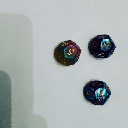

1/1 [==============================] - 0s 21ms/step
{'d10': 0.027427012, 'd12': 8.374946e-06, 'd20': 0.012404105, 'd4': 0.00019779496, 'd6': 0.85302424, 'd8': 0.106938474, 'dicesback': 1.8745565e-09}
1/1 [==============================] - 0s 40ms/step


In [25]:
sample_url = lst_few[2]

sample_img_original = download_image(sample_url)
sample = prepare_image(sample_img_original, (img_size, img_size))

display(sample)

x = np.array(sample)
x = np.array([x])
X = preprocess(x, 255)

classes_prob = predict(X, detection_model)
print(dict(zip(classes, classes_prob)))

f_maps = get_feature_maps(X, detection_model, n_layer=4, img_size=img_size)
f_mask = get_mask(f_maps, threshold=1.6)

# mask = upsample_mask(f_mask).predict(np.array([f_mask]))[0]
mask = f_mask[:,:,np.newaxis].copy()

# plt.imshow(mask)
# plt.show()

labeled_masks = get_clusters(mask)
anchors = get_anchors(labeled_masks=labeled_masks)

num_mask = iter(range(labeled_masks.shape[2]))


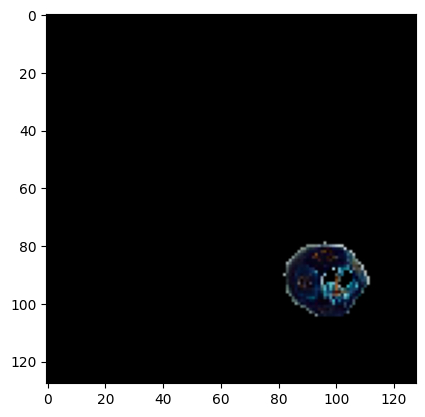

In [29]:
x = preprocess(np.array(sample), 255)
# x = np.array(sample, dtype='float')
n_map = next(num_mask)

x[:,:,0] *= labeled_masks[:,:,n_map]
x[:,:,1] *= labeled_masks[:,:,n_map]
x[:,:,2] *= labeled_masks[:,:,n_map]

plt.imshow(x)
plt.show()

In [ ]:
# msk = labeled_mask[:, :, 1]
# size = labeled_mask.shape[0]

# blank = np.zeros((size, size, 1), dtype='int')
# msk = np.array(msk[:, :, np.newaxis], dtype='int') * 255
# msk = np.concatenate((msk, blank, blank), axis=-1)
# msk_image = Image.fromarray(msk, mode="RGB")
# # msk_image = msk_image.resize((480,480))
# np.array(msk_image).shape
# msk_image.thumbnail((128, 128), Image.Resampling.LANCZOS)
# msk_image(sample_img_original)

In [30]:
x = preprocess(np.array(sample), 255)
# x = np.array(sample, dtype='float')

slices = get_slices(x, anchors, dh=15)

it_slices = iter(slices.keys())

In [37]:
tst_slice = slices[next(it_slices)][1]

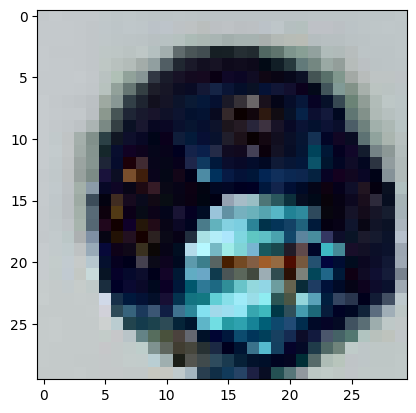

In [38]:
T = np.array([tst_slice])
plt.imshow(T[0])


In [15]:
classes_prob = predict(T, detection_model)

dict(zip(classes, classes_prob))

1/1 [==============================] - 0s 18ms/step


{'d10': 6.553842e-07,
 'd12': 1.8548843e-11,
 'd20': 5.983892e-12,
 'd4': 2.135622e-06,
 'd6': 0.9994752,
 'd8': 0.0005221326,
 'dicesback': 3.6597952e-14}

In [ ]:
layer_visualization(tst_slice, detection_model, preprocess=preprocess, n_layer=4, img_size=img_size)


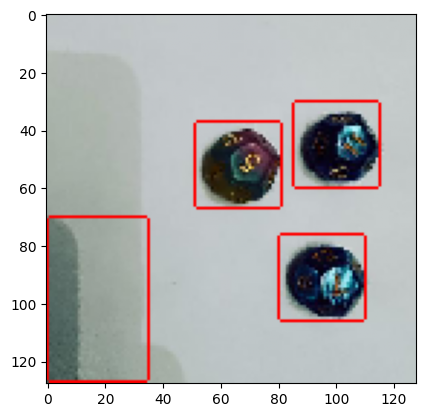

In [39]:
x = preprocess(np.array(sample), 255)
# x = np.array(sample, dtype='float')

boxed_sample = plot_boxes(x, anchors, dh=15)

plt.imshow(boxed_sample)
plt.show()


In [ ]:
# for lb_mask in range(labeled_masks.shape[2]):

lb_mask = range(labeled_masks.shape[2])[0]

labeled_masks[:, :, lb_mask].shape

x_sliced = x.copy()

x_sliced[:, :, 0] *=labeled_masks[:, :, lb_mask]
x_sliced[:, :, 1] *=labeled_masks[:, :, lb_mask]
x_sliced[:, :, 2] *=labeled_masks[:, :, lb_mask]

plt.imshow(x_sliced)

In [ ]:
# train_path = f"{start_path}/train/"
# val_path = f"{start_path}/valid/"

# train_gen = ImageDataGenerator(preprocessing_function=preprocess, #rescale=1./255)
# #     width_shift_range=0.2,
# #     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
# train_dataset = train_gen.flow_from_directory(directory=train_path,
#                                               target_size=(img_size, img_size),
# #                                               classes=['dicesback'],
#                                               class_mode='categorical',
#                                               shuffle=True,
#                                               batch_size=64)

# valid_gen = ImageDataGenerator(preprocessing_function=preprocess) #rescale=1./255)
# valid_dataset = valid_gen.flow_from_directory(directory=val_path,
#                                               target_size=(img_size, img_size),
# #                                               classes=['dicesback'],
#                                               class_mode='categorical',
#                                               shuffle=True,
#                                               batch_size=64)

# classes = list(train_dataset.class_indices.keys())

# print(train_dataset.class_indices, classes)

# print(valid_dataset.class_indices, classes)

In [ ]:
# train_imgs = next(train_dataset)

# fig, axes = plt.subplots(4, 8, figsize=(16,12))
# for i, ax in enumerate(axes.flatten()):
#     ax.imshow(train_imgs[0][i])
#     ax.set_xlabel(train_imgs[1][i])
# # plt.tight_layout()

In [ ]:
def test_samples(model, lst, n_layer):
    
    for sample in lst:
        
        if isinstance(sample, str):
            sample_img_original = download_image(sample)
            sample_img = prepare_image(sample_img_original, (img_size, img_size))

            display(sample_img)

            x = np.array(sample_img)
            X = np.array([x])
            X = preprocess(X, 255)
        elif isinstance(sample, np.ndarray):
            X = np.array([sample])
        
#         display(plt.imshow(X[0]))
        result = model.predict(X)[0]
        
        display(dict(zip(classes, result)))
#         mean_mask, x_center, y_center = get_mask(sample_url, viz_model = model, n_layer=n_layer)
        
#         sample_mask = Image.fromarray(mean_mask)
#         sample_mask.show()
#         display(sample_mask)
#         plt.scatter(x_center, y_center, marker='x', color='r')


test_samples(detection_model, lst_d8)